# Dalton Schoen


## Midterm Project

"On my honor, as a student, I have neither given
nor received unauthorized aid on this academic work."

10/16/19

## 1. Introduction

### 1.1 Background

There are several factors that go into an IMDB score. By looking into certain things that we have data on provided in the data set, hopefully we can more accurately predict what goes into a good IMDB score. This project will go through an analysis of things such as ratings, director names, facebook likes and several other things. The goal is to be able to more accurately identify what goes into a good IMDB score.

### 1.2 Data Description

The dataset that has been provided for the pjoject was taken from data world and can be found here. https://data.world/popculture/imdb-5000-movie-dataset

The data set contains information about movies and how it relates to the IMDB score. Some of the data includes title, duration, likes, names, and several other factors.

### 1.3 Problem Statement

We would like to analyze the given dataset to see if we can draw relationships between certain variables to better predict what factors can positively influence the IMDB score. 

## 2. Data Exploration

In [152]:
!pip install pingouin


In [153]:
!pip install seaborn


In [154]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

import pingouin as pg
import seaborn as sns

### 2.1 Load Data

In [155]:
df = pd.read_excel('movieData.xls')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


### 2.3 Remove Duplicates

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [157]:
len(df)

5043

In [158]:
df = df.drop_duplicates(keep="last")

In [159]:
len(df)

4998

### Familiarize with the Data

#### Look into different types of movies based of different attributes such as their content rating, country of orgin, language, etc.

In [160]:
df['content_rating'].value_counts()

R            2098
PG-13        1444
PG            698
Not Rated     116
G             112
Unrated        60
Approved       55
TV-14          30
TV-MA          19
TV-PG          13
X              13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y            1
TV-Y7           1
Name: content_rating, dtype: int64

In [161]:
df['country'].value_counts().head(10)

USA          3773
UK            443
France        154
Canada        124
Germany        96
Australia      55
India          34
Spain          33
China          28
Italy          23
Name: country, dtype: int64

In [162]:
df['language'].value_counts().head(10)

English      4662
French         73
Spanish        40
Hindi          28
Mandarin       24
German         19
Japanese       17
Russian        11
Cantonese      11
Italian        11
Name: language, dtype: int64

#### Looks as though we have a very broad data set that includes movies of all ratings and from many different countries.

In [163]:
df.groupby('genres').size()

genres
Action                                                             11
Action|Adventure                                                   10
Action|Adventure|Animation|Comedy|Crime|Family|Fantasy              1
Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller     1
Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi               2
                                                                   ..
Sci-Fi|Thriller                                                    10
Thriller                                                           19
Thriller|War                                                        1
Thriller|Western                                                    1
Western                                                            12
Length: 914, dtype: int64

### 3. Data Cleaning

### 3.1 Missing Values

In [164]:
df.isnull().sum()

color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

In [165]:
df.isnull().sum()

color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

In [166]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4949.000000,4983.000000,4895.000000,4975.000000,4991.000000,4.124000e+03,4.998000e+03,4998.000000,4985.000000,4977.000000,4.511000e+03,4891.000000,4985.000000,4998.000000,4671.000000,4998.000000
mean,139.890079,107.213325,688.679060,639.900905,6556.939892,4.832565e+07,8.347020e+04,9676.941176,1.368907,272.014667,3.974787e+07,2002.468820,1642.998796,6.441056,2.221417,7487.430172
std,121.477586,25.248775,2821.649616,1643.298282,15061.586700,6.796483e+07,1.380866e+05,18165.404578,2.014623,377.776210,2.069689e+08,12.475235,4030.925303,1.124107,1.391185,19290.726563
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,611.500000,5.304835e+06,8.560000e+03,1405.500000,0.000000,64.000000,6.000000e+06,1999.000000,280.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,369.000000,984.000000,2.544575e+07,3.426050e+04,3085.500000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,162.500000
75%,195.000000,118.000000,192.000000,635.000000,11000.000000,6.231942e+07,9.612075e+04,13740.500000,2.000000,324.000000,4.500000e+07,2011.000000,917.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


### 3.2 Fix Null Values

In [167]:
df['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [168]:
df.groupby('color').size()

color
 Black and White     207
Color               4772
dtype: int64

In [169]:
df['color'].replace({'Color':1, " Black and White":0}, inplace=True)

In [170]:
df['color'].fillna(1, inplace=True)

In [171]:
df.groupby('color').size()

color
0.0     207
1.0    4791
dtype: int64

In [172]:
df['color'] = df['color'].astype(int)

In [173]:
df['duration'].fillna(df['duration'].mean(), inplace=True)

In [174]:
df['num_critic_for_reviews'].fillna(df['num_critic_for_reviews'].mean(), inplace=True)

In [175]:
df['director_facebook_likes'].fillna(0, inplace=True)

In [176]:
df['actor_1_facebook_likes'].fillna(0, inplace=True)
df['actor_2_facebook_likes'].fillna(0, inplace=True)
df['actor_3_facebook_likes'].fillna(0, inplace=True)

In [177]:
df['num_user_for_reviews'].fillna(df['num_user_for_reviews'].mean, inplace=True)

In [178]:
df['facenumber_in_poster'].fillna(df['facenumber_in_poster'].mean, inplace=True)

In [179]:
df['aspect_ratio'].fillna(df['aspect_ratio'].mean, inplace=True)

In [180]:
df['language'].fillna('English', inplace=True)

In [181]:
df['country'].fillna('USA', inplace=True)

In [182]:
df['content_rating'].fillna('NR', inplace=True)

In [183]:
df['gross'].fillna(df['gross'].mean(), inplace=True)

In [184]:
df['budget'].fillna(df['budget'].mean(), inplace=True)

In [185]:
df['title_year'].fillna(df['title_year'].mean(), inplace=True)

In [186]:
df.isnull().sum()

color                          0
director_name                103
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster           0
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews           0
language                       0
country                        0
content_rating                 0
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

In [187]:
df.dropna(inplace=True)

In [188]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

#### To handle the null values, I replaced as many as I could with a zero or the mean value of the set, however since some of the attributes were based on names I just dropped them from the data set.

### Add a new column for profit of the movie

In [189]:
df['profit'] = df['gross'] - df['budget']

## 4. Analysis

#### Need to split up the genres. Since many movies crossover between multiple genres we will have to make sure they are only in one category. 

In [190]:
df['genres']= df['genres'].str.replace('|', ' ')

In [191]:
df['genres'] = df['genres'].str.split()
df.genres.head()

0    [Action, Adventure, Fantasy, Sci-Fi]
1            [Action, Adventure, Fantasy]
2           [Action, Adventure, Thriller]
3                      [Action, Thriller]
5             [Action, Adventure, Sci-Fi]
Name: genres, dtype: object

In [192]:
df['genres']=df['genres'].apply(lambda x: x[0])

In [193]:
df['genres'].head()

0    Action
1    Action
2    Action
3    Action
5    Action
Name: genres, dtype: object

In [194]:
df['genres'].value_counts()

Comedy         1262
Action         1107
Drama           895
Adventure       437
Crime           323
Biography       247
Horror          220
Documentary      59
Animation        55
Fantasy          50
Mystery          31
Thriller         17
Sci-Fi           12
Western          10
Family            5
Musical           4
Romance           2
Film-Noir         1
Music             1
Name: genres, dtype: int64

### Compare Genre to Average IMDB Score

Text(0.5, 1.0, 'Average Score By Genre')

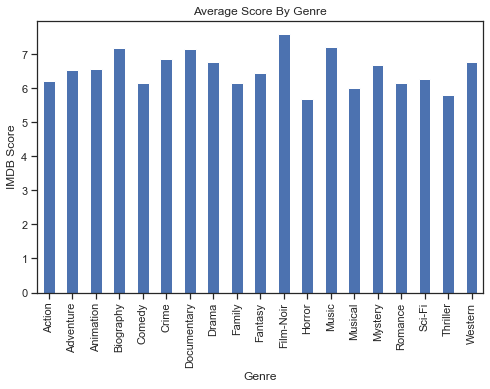

In [195]:
plt.figure(figsize=[8,5])
df.groupby('genres')['imdb_score'].mean().plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('IMDB Score')
plt.title("Average Score By Genre")

### Compare Country to Average IMDB Score

Text(0.5, 1.0, 'Average Score By Country')

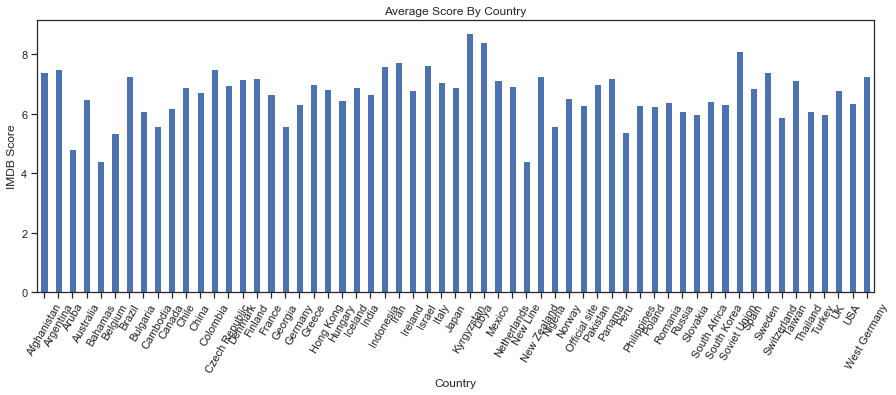

In [196]:
plt.figure(figsize=[15,5])
df.groupby('country')['imdb_score'].mean().plot(kind='bar', rot=60)
plt.xlabel('Country')
plt.ylabel('IMDB Score')
plt.title("Average Score By Country")


### Duration and IMBD Score

Text(0.5, 1.0, 'Duration of Movie vs. IMDB Score')

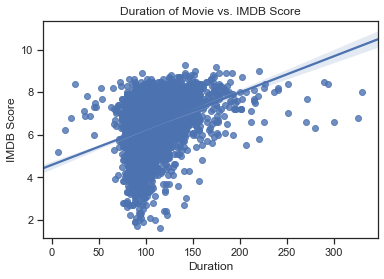

In [197]:
sns.regplot(x='duration', y='imdb_score', data=df)
plt.xlabel('Duration')
plt.ylabel('IMDB Score')
plt.title("Duration of Movie vs. IMDB Score")

#### It would seem there is a positive correlation between the duration of a movie and the IMDB score.

### Relationship between number of users who voted and the IMDB score

Text(0.5, 1.0, 'Number of Users Who Voted vs. IMDB Score')

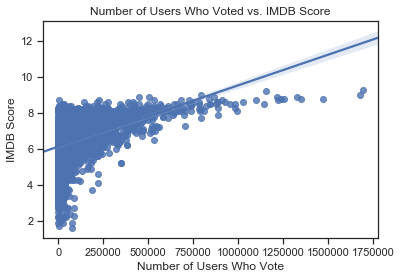

In [198]:
sns.regplot(x='num_voted_users', y='imdb_score', data=df)
plt.xlabel('Number of Users Who Vote')
plt.ylabel('IMDB Score')
plt.title("Number of Users Who Voted vs. IMDB Score")

#### There is a positive correltation between the number of votes and the IMDB score. Even though there appears to be a positive sloped line there is not a very strong correlation between number of votes and IMDB score. If a movie gets only a few votes it appears to generally have a lower score, but if they get way more votes than other movies it does not seem to tremendously increase the score.

### Number of director facebook likes and the IMDB score

Text(0.5, 1.0, 'Average Score and Director Facebook Likes')

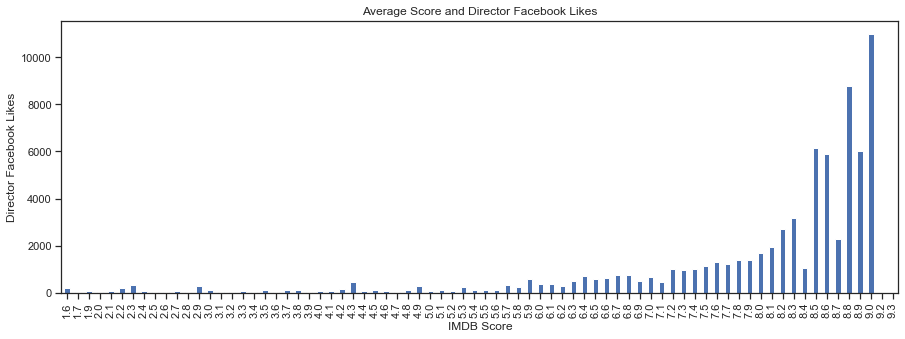

In [199]:
plt.figure(figsize=[15,5])
df.groupby('imdb_score')['director_facebook_likes'].mean().plot(kind='bar')
plt.xlabel('IMDB Score')
plt.ylabel('Director Facebook Likes')
plt.title("Average Score and Director Facebook Likes")

#### Very apparent that the higher IMDB scored movie directors get more facebook likes

#### Look into the movie facebook likes and the score

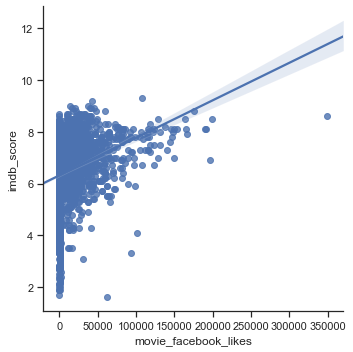

In [200]:
sns.lmplot('movie_facebook_likes', 'imdb_score', df)

#### In general, the movies that get more likes on facebook have better IMDB scores

Text(0.5, 1.0, 'Budget vs. IMDB Score')

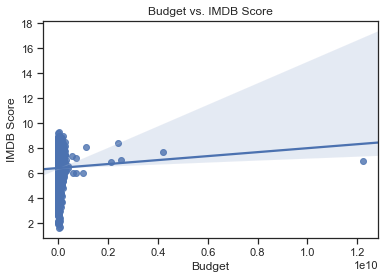

In [201]:
sns.regplot(x='budget', y='imdb_score', data=df)
plt.xlabel('Budget')
plt.ylabel('IMDB Score')
plt.title("Budget vs. IMDB Score")

#### Not a huge correlation between the Budget and the IMDB score

### Relationship between Gross revenue and IMDB Score

Text(0.5, 1.0, 'Gross Revenue vs. IMDB Score')

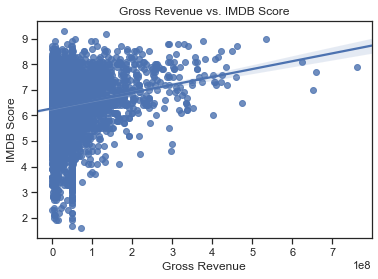

In [202]:
sns.regplot(x='gross', y='imdb_score', data=df)
plt.xlabel('Gross Revenue')
plt.ylabel('IMDB Score')
plt.title("Gross Revenue vs. IMDB Score")

#### Typically the higher grossing movies receive a higher IMDB score.

Text(0.5, 1.0, 'IMDB Score by Content Rating')

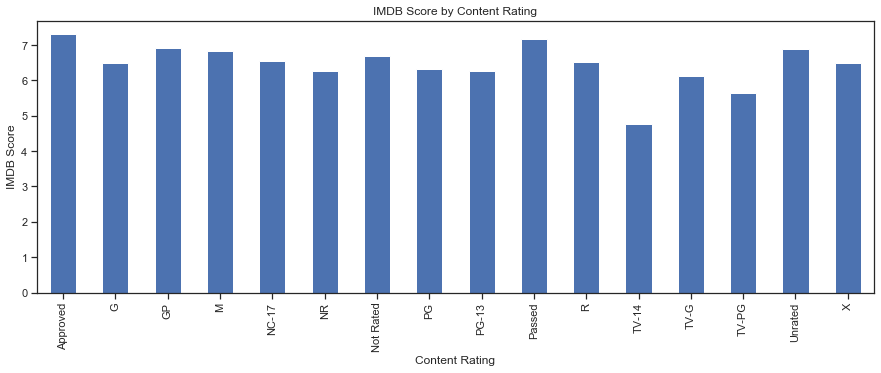

In [203]:
plt.figure(figsize=[15,5])
df.groupby('content_rating')['imdb_score'].mean().plot(kind='bar')
plt.xlabel('Content Rating')
plt.ylabel('IMDB Score')
plt.title("IMDB Score by Content Rating")

#### Not a huge disparity between the average IMDB score and the content rating of the movie

### Look into the top directors

In [204]:
top_dawgs = df.groupby('director_name')['imdb_score'].mean().sort_values(ascending=False).head(12)
top_dawgs

director_name
Sadyk Sher-Niyaz           8.700
Charles Chaplin            8.600
Damien Chazelle            8.500
Raja Menon                 8.500
Ron Fricke                 8.500
Majid Majidi               8.500
Sergio Leone               8.475
Christopher Nolan          8.425
Catherine Owens            8.400
Rakeysh Omprakash Mehra    8.400
Moustapha Akkad            8.400
Bill Melendez              8.400
Name: imdb_score, dtype: float64

Text(0.5, 1.0, 'Average Score By Director')

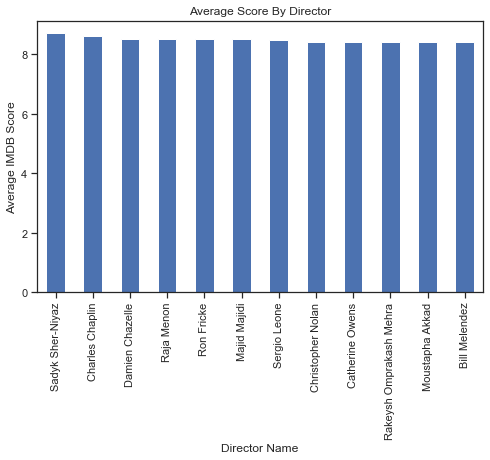

In [205]:
plt.figure(figsize=[8,5])
top_dawgs.plot(kind='bar')
plt.xlabel('Director Name')
plt.ylabel('Average IMDB Score')
plt.title("Average Score By Director")

### Look Into Top Movies in terms of IMDB Score and Profit

In [206]:
top_movies_imdb = df.groupby('movie_title')['imdb_score'].mean().sort_values(ascending=False).head(20)
top_movies_imdb

movie_title
The Shawshank Redemption¶ÿ                             9.3
The Godfather¶ÿ                                        9.2
The Godfather: Part II¶ÿ                               9.0
The Dark Knight¶ÿ                                      9.0
Schindler's List¶ÿ                                     8.9
The Good, the Bad and the Ugly¶ÿ                       8.9
The Lord of the Rings: The Return of the King¶ÿ        8.9
Pulp Fiction¶ÿ                                         8.9
12 Angry Men¶ÿ                                         8.9
Inception¶ÿ                                            8.8
Fight Club¶ÿ                                           8.8
Forrest Gump¶ÿ                                         8.8
The Lord of the Rings: The Fellowship of the Ring¶ÿ    8.8
Star Wars: Episode V - The Empire Strikes Back¶ÿ       8.8
Goodfellas¶ÿ                                           8.7
City of God¶ÿ                                          8.7
Seven Samurai¶ÿ                             

In [207]:
top_movies_profit = df.groupby('movie_title')['profit'].mean().sort_values(ascending=False).head(20)
top_movies_profit

movie_title
Avatar¶ÿ                                           523505847.0
Jurassic World¶ÿ                                   502177271.0
Titanic¶ÿ                                          458672302.0
Star Wars: Episode IV - A New Hope¶ÿ               449935665.0
E.T. the Extra-Terrestrial¶ÿ                       424449459.0
The Avengers¶ÿ                                     403279547.0
The Lion King¶ÿ                                    377783777.0
Star Wars: Episode I - The Phantom Menace¶ÿ        359544677.0
The Dark Knight¶ÿ                                  348316061.0
The Hunger Games¶ÿ                                 329999255.0
Deadpool¶ÿ                                         305024263.0
The Hunger Games: Catching Fire¶ÿ                  294645577.0
Jurassic Park¶ÿ                                    293784000.0
Despicable Me 2¶ÿ                                  292049635.0
American Sniper¶ÿ                                  291323553.0
Finding Nemo¶ÿ                             

Text(0.5, 1.0, 'Top movies Profit vs. IMDB')

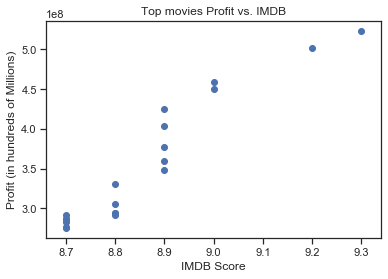

In [208]:
plt.scatter(top_movies_imdb, top_movies_profit)
plt.xlabel('IMDB Score')
plt.ylabel('Profit (in hundreds of Millions)')
plt.title("Top movies Profit vs. IMDB")

In [209]:
worst_movies_profit = df.groupby('movie_title')['profit'].mean().sort_values(ascending=False).tail(20)
worst_movies_profit

movie_title
Les couloirs du temps: Les visiteurs II¶ÿ   -1.398539e+08
Battleship¶ÿ                                -1.438268e+08
Paa¶ÿ                                       -1.498008e+08
The Polar Express¶ÿ                         -1.643346e+08
The Protector¶ÿ                             -1.880945e+08
John Carter¶ÿ                               -1.906413e+08
Ong-bak 2¶ÿ                                 -2.998979e+08
The Messenger: The Story of Joan of Arc¶ÿ   -3.758687e+08
The Legend of Suriyothai¶ÿ                  -3.995457e+08
Red Cliff¶ÿ                                 -5.530052e+08
Kites¶ÿ                                     -5.983975e+08
Kabhi Alvida Naa Kehna¶ÿ                    -6.967246e+08
Tango¶ÿ                                     -6.983127e+08
Godzilla 2000¶ÿ                             -9.899626e+08
Akira¶ÿ                                     -1.099561e+09
Steamboy¶ÿ                                  -2.127110e+09
Princess Mononoke¶ÿ                         -2.397702e+09
Fa

In [210]:
worst_movies_imdb = df.groupby('movie_title')['imdb_score'].mean().sort_values(ascending=False).tail(20)
worst_movies_imdb

movie_title
Baby Geniuses¶ÿ                     2.5
Sunday School Musical¶ÿ             2.5
Gigli¶ÿ                             2.4
Battlefield Earth¶ÿ                 2.4
Epic Movie¶ÿ                        2.3
Chairman of the Board¶ÿ             2.3
Alone in the Dark¶ÿ                 2.3
Subconscious¶ÿ                      2.2
Son of the Mask¶ÿ                   2.2
Snow White: A Deadly Summer¶ÿ       2.2
Crossover¶ÿ                         2.1
From Justin to Kelly¶ÿ              2.1
Glitter¶ÿ                           2.1
Who's Your Caddy?¶ÿ                 2.0
United Passions¶ÿ                   2.0
Disaster Movie¶ÿ                    1.9
Superbabies: Baby Geniuses 2¶ÿ      1.9
The Helix... Loaded¶ÿ               1.9
Foodfight!¶ÿ                        1.7
Justin Bieber: Never Say Never¶ÿ    1.6
Name: imdb_score, dtype: float64

## 5. Correlation Analysis

In [211]:
df.corr()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit
color,1.000000,0.025597,-0.053524,-0.042418,0.032408,0.038640,0.036663,-0.016170,0.045725,0.020647,0.312081,0.034274,-0.150805,0.031755,-0.009006
num_critic_for_reviews,0.025597,1.000000,0.244006,0.180228,0.261401,0.188282,0.445006,0.618904,0.257767,0.114061,0.307578,0.273148,0.333374,0.689275,0.024858
duration,-0.053524,0.244006,1.000000,0.173724,0.125635,0.083464,0.229770,0.338038,0.118819,0.069735,-0.129341,0.131511,0.350074,0.213186,0.002181
director_facebook_likes,-0.042418,0.180228,0.173724,1.000000,0.122290,0.093403,0.140065,0.299847,0.122035,0.020296,-0.062446,0.120049,0.177856,0.161896,0.023158
actor_3_facebook_likes,0.032408,0.261401,0.125635,0.122290,1.000000,0.255047,0.285919,0.273992,0.477768,0.044364,0.103133,0.554639,0.054999,0.266266,0.044391
actor_1_facebook_likes,0.038640,0.188282,0.083464,0.093403,0.255047,1.000000,0.141684,0.191773,0.951075,0.021481,0.095128,0.399205,0.077098,0.135234,0.022492
gross,0.036663,0.445006,0.229770,0.140065,0.285919,0.141684,1.000000,0.615726,0.224817,0.099735,0.027037,0.248506,0.175959,0.362474,0.209724
num_voted_users,-0.016170,0.618904,0.338038,0.299847,0.273992,0.191773,0.615726,1.000000,0.259825,0.076026,0.022203,0.259445,0.434269,0.532448,0.114770
cast_total_facebook_likes,0.045725,0.257767,0.118819,0.122035,0.477768,0.951075,0.224817,0.259825,1.000000,0.034281,0.120740,0.637311,0.088019,0.205282,0.035496
budget,0.020647,0.114061,0.069735,0.020296,0.044364,0.021481,0.099735,0.076026,0.034281,1.000000,0.046899,0.041467,0.029054,0.058542,-0.951968


In [212]:
df.corr()['imdb_score'].sort_values(ascending=False)

imdb_score                   1.000000
num_voted_users              0.434269
duration                     0.350074
num_critic_for_reviews       0.333374
movie_facebook_likes         0.258531
director_facebook_likes      0.177856
gross                        0.175959
actor_2_facebook_likes       0.089289
cast_total_facebook_likes    0.088019
actor_1_facebook_likes       0.077098
actor_3_facebook_likes       0.054999
budget                       0.029054
profit                       0.025598
color                       -0.150805
title_year                  -0.205103
Name: imdb_score, dtype: float64

As you would expect there is a positive correlation between the number of critic reviews and the number of voted users. There is also a positive correlation between duration and IMDB score but it is not a super strong correlation. There is a very strong negative correlation between budget and profit which makes sense. 

## 6. Stortelling

#### What factors can help predict which movies will have better IMDB scores?

1. It is clear that from the correlation analysis, the number of critic reviews and number of voted users has a strong correlation with the IMDB score. But since this cannot be controlled let's look into the factors from the groupby analysis.
2. Based on the top 20 movies in terms of profit and IMDB score. The most profitable movies had the highest IMDB score.
3. Something that was very interesting to note is the relationship between the duration of the movie and the IMDB score. There is a positive correlation so in general the longer movies have better scores. However, at some point the movie is too long and does not benefit the score any longer. It looks as though the sweet spot for the duration of the movie would be between 98-125 mins.
4. Something else that was quite interesting was that Comedy and Horror movies, in general, did not have as good of scores. Whereas Biography and Documentary movies scored much better relative to other movies.
5. The analysis on the director statistics could have been better. Since the analysis was done using the average IMDB score for the diretor, several directors may not have made the top of the chart if they had a single movie that was not good and brought down their score. What the analysis did show however was the directors who have beenthe best consistently. The only director name I recognized was Christopher Nolan. He has directed several movies that I like and is average IMDB sore is a 8.45. So if you want a good score, Christopher Nolan would not be a bad choice.
6. It was seen that the budget did not really have an impact on the score. My suggestion would be that pouring money into the film does not mean the IMDB score will be better.
7. The movies rated TV-14 did not score well so I would steer clear of those ratings.
8. Something else I did was look at the top 20 movies in terms of profit and IMDB score. It was cool to look at the top all time movies in terms of their score and how much money they made. Something to note is that they are al, for the most part, classics. The classic all-time great movies make for the best scores and the best profit.

## Project Part 2

In [213]:
!pip install plotly


In [214]:
!pip install sklearn


In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

from sklearn import linear_model

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.graph_objects as go
import plotly.express as px


from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from IPython.display import display
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc



from pandas.plotting import scatter_matrix

import pingouin as pg

import warnings
warnings.filterwarnings("ignore")


#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

import statsmodels.api as sm
from statsmodels.formula.api import ols

import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
# feature selection
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import chi2

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4738 entries, 0 to 5042
Data columns (total 29 columns):
color                        4738 non-null int64
director_name                4738 non-null object
num_critic_for_reviews       4738 non-null float64
duration                     4738 non-null float64
director_facebook_likes      4738 non-null float64
actor_3_facebook_likes       4738 non-null float64
actor_2_name                 4738 non-null object
actor_1_facebook_likes       4738 non-null float64
gross                        4738 non-null float64
genres                       4738 non-null object
actor_1_name                 4738 non-null object
movie_title                  4738 non-null object
num_voted_users              4738 non-null int64
cast_total_facebook_likes    4738 non-null int64
actor_3_name                 4738 non-null object
facenumber_in_poster         4738 non-null object
plot_keywords                4738 non-null object
movie_imdb_link              4738 non-nu

In [217]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
profit                       0
dtype: int64

# Regression 

In [219]:
df.corr()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit
color,1.000000,0.025597,-0.053524,-0.042418,0.032408,0.038640,0.036663,-0.016170,0.045725,0.020647,0.312081,0.034274,-0.150805,0.031755,-0.009006
num_critic_for_reviews,0.025597,1.000000,0.244006,0.180228,0.261401,0.188282,0.445006,0.618904,0.257767,0.114061,0.307578,0.273148,0.333374,0.689275,0.024858
duration,-0.053524,0.244006,1.000000,0.173724,0.125635,0.083464,0.229770,0.338038,0.118819,0.069735,-0.129341,0.131511,0.350074,0.213186,0.002181
director_facebook_likes,-0.042418,0.180228,0.173724,1.000000,0.122290,0.093403,0.140065,0.299847,0.122035,0.020296,-0.062446,0.120049,0.177856,0.161896,0.023158
actor_3_facebook_likes,0.032408,0.261401,0.125635,0.122290,1.000000,0.255047,0.285919,0.273992,0.477768,0.044364,0.103133,0.554639,0.054999,0.266266,0.044391
actor_1_facebook_likes,0.038640,0.188282,0.083464,0.093403,0.255047,1.000000,0.141684,0.191773,0.951075,0.021481,0.095128,0.399205,0.077098,0.135234,0.022492
gross,0.036663,0.445006,0.229770,0.140065,0.285919,0.141684,1.000000,0.615726,0.224817,0.099735,0.027037,0.248506,0.175959,0.362474,0.209724
num_voted_users,-0.016170,0.618904,0.338038,0.299847,0.273992,0.191773,0.615726,1.000000,0.259825,0.076026,0.022203,0.259445,0.434269,0.532448,0.114770
cast_total_facebook_likes,0.045725,0.257767,0.118819,0.122035,0.477768,0.951075,0.224817,0.259825,1.000000,0.034281,0.120740,0.637311,0.088019,0.205282,0.035496
budget,0.020647,0.114061,0.069735,0.020296,0.044364,0.021481,0.099735,0.076026,0.034281,1.000000,0.046899,0.041467,0.029054,0.058542,-0.951968


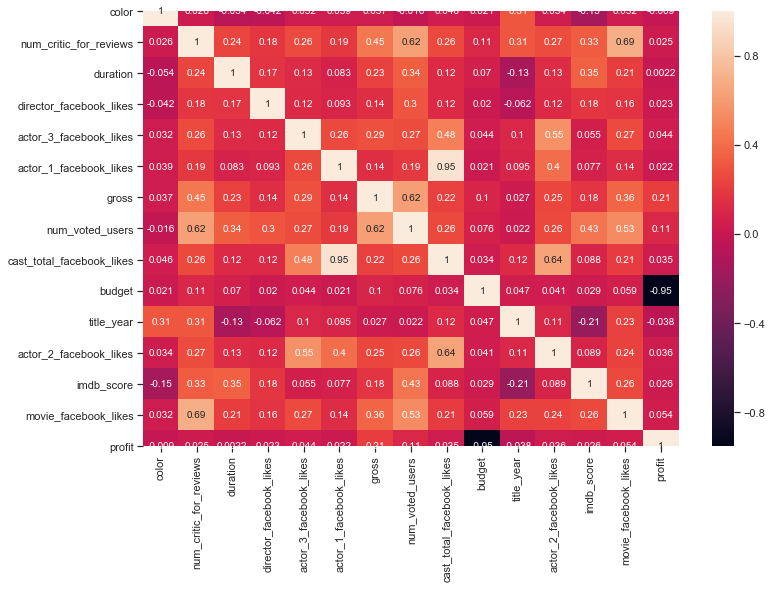

In [220]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [221]:
df['bins']= pd.cut(df['imdb_score'], 4, labels = ['1','2','3','4'])
df.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,bins
0,1,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,4
1,1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3
2,1,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,3
3,1,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,4
5,1,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,3


In [240]:
runs_reg_model = ols("imdb_score~movie_facebook_likes+actor_1_facebook_likes+title_year+budget+num_voted_users+gross+director_facebook_likes+num_critic_for_reviews+duration",df)
runs_reg = runs_reg_model.fit()
print(runs_reg.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     238.5
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:05:35   Log-Likelihood:                -6298.8
No. Observations:                4738   AIC:                         1.262e+04
Df Residuals:                    4728   BIC:                         1.268e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

There are too many variables included in this regression. While interesting to see how all of the variables can affect the bigger picture of IMDB score there is simply too much going on in this regression to see what is happening. I will run the regression again with fewer variables.

In [244]:
runs_reg_model = ols("imdb_score~budget+gross+num_critic_for_reviews+duration",df)
runs_reg = runs_reg_model.fit()
print(runs_reg.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     274.7
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          1.22e-212
Time:                        18:13:12   Log-Likelihood:                -6690.9
No. Observations:                4738   AIC:                         1.339e+04
Df Residuals:                    4733   BIC:                         1.342e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

The number of critic reviews and the duration had significance on the IMDB score because the p-value was 0. This makes sense becuase a movie that is too long or too short does not score well so it makes sense that it has a significant affect on score. R squared value is .188 so that could be improved.

## Classification

### KNN

In [256]:
#assigning columns to X and Y variables
X = df[['movie_facebook_likes','actor_1_facebook_likes','title_year','budget','num_voted_users','gross','director_facebook_likes','num_critic_for_reviews','duration']]
y = df['bins']

In [257]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4738 entries, 0 to 5042
Data columns (total 9 columns):
movie_facebook_likes       4738 non-null int64
actor_1_facebook_likes     4738 non-null float64
title_year                 4738 non-null float64
budget                     4738 non-null float64
num_voted_users            4738 non-null int64
gross                      4738 non-null float64
director_facebook_likes    4738 non-null float64
num_critic_for_reviews     4738 non-null float64
duration                   4738 non-null float64
dtypes: float64(7), int64(2)
memory usage: 370.2 KB


In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)

In [259]:
print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))

0.5773558368495078
--------------------------------------------------------
[[  0   4  22   0]
 [  1  30 156  10]
 [  4 100 751  68]
 [  2  25 209  40]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        26
           2       0.19      0.15      0.17       197
           3       0.66      0.81      0.73       923
           4       0.34      0.14      0.20       276

    accuracy                           0.58      1422
   macro avg       0.30      0.28      0.28      1422
weighted avg       0.52      0.58      0.54      1422



The KNN model gives an accuracy of 57% for predicting the bin of the IMDB score for the movies. This accuracy is not very good. However, 751 movies were correctly predicted for the third bin which was surprisingly accurate. Overall, 821 movies were correctly predicted as to which bin their score would fall into.

### Decision Tree

In [260]:
#Decision Tree

print(y.shape, X.shape)

(4738,) (4738, 9)


In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize DecisionTreeClassifier() ... name your decision model "dt"
dt = DecisionTreeClassifier(max_features = 5, max_leaf_nodes = 9)

# Train a decision tree model
dt = dt.fit(X_train, y_train)

dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=5, max_leaf_nodes=9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [263]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))


0.680731364275668
--------------------------------------------------------
[[  0   0  26   0]
 [  0   0 196   1]
 [  0   0 869  54]
 [  0   0 177  99]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        26
           2       0.00      0.00      0.00       197
           3       0.69      0.94      0.79       923
           4       0.64      0.36      0.46       276

    accuracy                           0.68      1422
   macro avg       0.33      0.33      0.31      1422
weighted avg       0.57      0.68      0.60      1422



The decision tree is 68% accurate which was better than the KNN method. It correctly predicted 968 out of 1422 movies. 

In [265]:
!pip install scikit-plot

  Using cached https://files.pythonhosted.org/packages/7c/47/32520e259340c140a4ad27c1b97050dd3254fdc517b1d59974d47037510e/scikit_plot-0.3.7-py3-none-any.whl


In [267]:
import scikitplot as skplt

<Figure size 720x720 with 0 Axes>

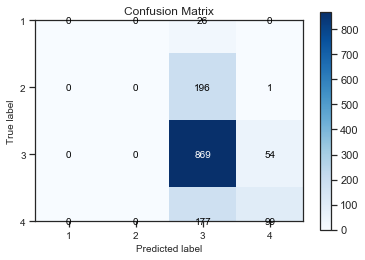

In [271]:
plt.figure(figsize = (10,10))
skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

Visual representation of the confusion matrix with color.

### Rnd Forest Classifier

In [272]:
clf = RandomForestClassifier(n_estimators=20)    
clf=clf.fit(X_train, y_train)

In [274]:
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.720112517580872
[[  0   5  19   2]
 [  3  60 134   0]
 [  0  52 828  43]
 [  0   3 137 136]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        26
           2       0.50      0.30      0.38       197
           3       0.74      0.90      0.81       923
           4       0.75      0.49      0.60       276

    accuracy                           0.72      1422
   macro avg       0.50      0.42      0.45      1422
weighted avg       0.70      0.72      0.69      1422



This model had an accuracy of 72% which is the highest accuracy I have been able to obtain thus far. 

#### Important Features

In [288]:
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['Importance']).sort_values('Importance', ascending=False)

,Importance
num_voted_users,0.177675
duration,0.133068
title_year,0.111967
budget,0.107947
gross,0.106400
num_critic_for_reviews,0.105426
actor_1_facebook_likes,0.100984
director_facebook_likes,0.083663
movie_facebook_likes,0.072870


This gives an idea of what attributes hold the most importance in terms of what will add to a higher IMDB score.

### Clustering

In [275]:
k_means = KMeans(init='k-means++', n_clusters=3, random_state=0)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [276]:
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [277]:
df = df.reset_index(drop=True)
df1 = df1.reset_index(drop=True)

df2 = df.join(df1)
df2.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,bins,cluster
0,1,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,4,0
1,1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3,0
2,1,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,3,0
3,1,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,4,0
4,1,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action,...,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,3,0


In [278]:
df2.groupby('cluster').mean()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit
cluster,,,,,,,,,,,,,,,
0,0.957532,145.607583,108.530167,704.623917,659.784914,6792.227974,4.889186e+07,87333.380097,10036.95394,3.573198e+07,2002.175364,1711.214663,6.427403,7777.825481,1.315988e+07
1,1.000000,363.000000,110.000000,584.000000,74.000000,629.000000,2.201412e+06,68883.000000,1173.00000,1.221550e+10,2006.000000,398.000000,7.000000,7000.000000,-1.221330e+10
2,1.000000,138.500000,120.750000,1530.750000,221.000000,526.750000,7.790335e+05,73597.500000,1154.75000,2.806880e+09,2002.750000,328.750000,7.525000,4145.000000,-2.806101e+09


In [279]:
df2.groupby(['cluster']).size()

cluster
0    4733
1       1
2       4
dtype: int64

In [280]:
df2.groupby('cluster')['imdb_score'].mean()

cluster
0    6.427403
1    7.000000
2    7.525000
Name: imdb_score, dtype: float64

This approach was unsuccessful as almost all of the entries were assigned to cluster 1. Because of this, I am going to use the Agglomerative Clustering to hopefully get better analysis.

In [281]:
agg= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)
agg.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [282]:
df1 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df1.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [283]:
df2 = df.join(df1)
df2.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,bins,cluster
0,1,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,4,0
1,1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3,0
2,1,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,3,0
3,1,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,4,0
4,1,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action,...,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,3,0


In [284]:
df2 = df.join(df1)
df2.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,bins,cluster
0,1,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,4,0
1,1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3,0
2,1,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,3,0
3,1,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,4,0
4,1,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action,...,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,3,0


In [285]:
df2.groupby('cluster').mean()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit
cluster,,,,,,,,,,,,,,,
0,0.978578,237.869523,118.265823,1391.969815,1338.787731,10761.546251,1.319401e+08,212897.655307,16876.073028,8.986482e+07,2004.255112,3334.777020,6.690652,18408.181110,4.207529e+07
1,0.951700,120.040122,105.832240,514.147868,471.620885,5692.257690,2.587768e+07,52537.235834,8141.709660,2.073078e+07,2001.599029,1261.296006,6.354452,4831.960604,5.146899e+06
2,1.000000,138.500000,120.750000,1530.750000,221.000000,526.750000,7.790335e+05,73597.500000,1154.750000,2.806880e+09,2002.750000,328.750000,7.525000,4145.000000,-2.806101e+09
3,1.000000,363.000000,110.000000,584.000000,74.000000,629.000000,2.201412e+06,68883.000000,1173.000000,1.221550e+10,2006.000000,398.000000,7.000000,7000.000000,-1.221330e+10


In [286]:
df2.groupby('cluster')['imdb_score'].mean()

cluster
0    6.690652
1    6.354452
2    7.525000
3    7.000000
Name: imdb_score, dtype: float64

In [287]:
df2.groupby('cluster').size()

cluster
0    1027
1    3706
2       4
3       1
dtype: int64

For some reason cluster 2 and 3 where hardly assigned any entries. But looking mainly into cluster 0 and 1 I will attempt to draw some conclusions. 

Cluster 0:
- Average duration of 118 minutes
- Average number of critic reviews was 237
- Average budget was around 90 million
- Facebook likes all across the board were high

Cluster 1:
- Average duration of 105 minutes
- Average number of critic reviews was 120
- Average budget was around 20 million
- Facebook likes all across the board were lower

Comparing the two clusters, it appears that cluster 0 was higher budget, higher profile movies. This is due to the higher budget, higher run time, more reviews, and more Facebook likes.

## Storytelling

### What we learned that can be of value to the client

The most important part of this analysis is to communicate insights to the client in order to provide value to them. Throughout the first half of the project we attempted to highlight the most important/high value attributes through charts and visual analysis. Now in this second part we attempted to perform a similar analysis through modeling. 

Through classifying using clf we were able to identify some of the most important variables in terms of their impact on IMDB score. The most important variables were found to be:
- Number of Voted Users
- Duration of the movie
- Year of Release
- Budget of the movie
- Grossing of the movie
- Number of critic reviews


A regression analysis was also run to identify important variables. From the regression analysis the variables of highest importance were determined to be:
- Duration of the movie
- Number of critic reviews


A few clusters were also created throughout the analysis. The cluster that had the highest average IMDB score showed these trends relative to the other clusters:
- Longer run time(duration)
- More critic reviews
- Higher budget
- More Facebook exposure



### Suggestions for the client

My suggestion to the client, in order to achieve the highest possible IMDB rating, make the movie a big production. I feel like making the movie a big production will allow the client to hit on all of the varaibles that have proven to yield a higher IMDB rating. The characteristics that need to be hit in this big production are as follows:
- High Budget
    - This means you need to pour a lot of resources into the movie
- Longer Run time
    - The longer run time will be more expensive but will create the
        bigger production we are going for.
- Create exposure
    - More exposure on Facebook
    - More critic reviews
    - Higher number of voted users
    
If you can make the movie a large production and hit these criteria you will give yourself the best chance at yielding a high IMDB score.